In [ ]:
# print((df1.iloc[:, 152]).value_counts())

# # clearing the variables to free my RAM space
# del df1

In [ ]:
# Splitting the big csv file in multiple csv files according each instance

import pandas as pd

# loading data
datasetDirPath = "../../../../data/ML/sets"
filePath = datasetDirPath + "dataset0.csv"
df0 = pd.read_csv(filePath)

# getting all changeOverCost values
allChangeOverCosts = (df0["changeover_costs"]).unique()

for index, changeOverCosts in enumerate(allChangeOverCosts):
    df_i = df0.loc[df0['changeover_costs'] == changeOverCosts]
    df_i.to_csv(datasetDirPath + str(index) + ".csv", index=False)

# # clearing the variables to free my RAM space
# del df0

In [ ]:
# adding instance index to pandas df

import pandas as pd
import os

datasetDirPath = "../../../../data/ML/sets/"
listFiles = os.listdir(datasetDirPath)

for file in listFiles:
    filePath = datasetDirPath + file
    instanceIndex = file.replace(".csv", "")
    df = pd.read_csv(filePath)
    df["instance_file_root_name"] = instanceIndex
    # df = df.iloc[:, 1:]
    df.to_csv(filePath, index=False)
    # print(df.head())



In [7]:
# Create the test set and the training set

import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

datasetDirPath = "../../../../data/ML/sets/preproc/"
fileRootName = datasetDirPath + "1"
filePath = fileRootName + ".csv"
strat_train_set_file_path = fileRootName + "_train_set.csv"
strat_test_set_file_path = fileRootName + "_test_set.csv"

df = pd.read_csv(filePath)
# i'm insterested only in the 300,000 first entries
df = df.iloc[:300000, :]

# print(df.iloc[:, -1].value_counts())

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_train_set, strat_test_set = (None, None)
for train_index, test_index in split.split(df, df.iloc[:, -1]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
strat_train_set.to_csv(strat_train_set_file_path, index=False)
strat_test_set.to_csv(strat_test_set_file_path, index=False)
    




In [6]:
# training with general ml classifier

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

datasetDirPath = "../../../../data/ML/sets/preproc/"
fileRootName = datasetDirPath + "1"
strat_train_set_file_path = fileRootName + "_train_set.csv"

df = pd.read_csv(strat_train_set_file_path)

# corr_matrix = df.iloc[:, :19].corr()
# print(corr_matrix)

training_data_labels = (df.iloc[:, -1] > ) 
training_data = df.iloc[:, :-1]

# df.head()

scaler = StandardScaler()
training_data = pd.DataFrame(scaler.fit_transform(training_data))

# training a model on the data collected
# sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(training_data, training_data_labels)

# trying to predict one's output

# y_train_pred = cross_val_predict(sgd_clf, training_data, training_data_labels, cv=7)
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, training_data, training_data_labels, cv=7, method="predict_proba")

y_train_pred = (y_probas_forest[:, 1] > .5)
print(y_train_pred)

print(confusion_matrix(training_data_labels, y_train_pred))

print(precision_score(training_data_labels, y_train_pred))

print(recall_score(training_data_labels, y_train_pred))


SyntaxError: invalid syntax (<ipython-input-6-1111a9ce5057>, line 20)

            3         2       2.1         1       3.1       1.1       2.2  \
3    1.000000 -0.053119 -0.047916  0.104260 -0.032402 -0.031718 -0.128211   
2   -0.053119  1.000000  0.090844 -0.028429  0.081528 -0.030165 -0.219222   
2.1 -0.047916  0.090844  1.000000 -0.040225  0.084444  0.017123 -0.151947   
1    0.104260 -0.028429 -0.040225  1.000000 -0.086352  0.030794 -0.196605   
3.1 -0.032402  0.081528  0.084444 -0.086352  1.000000 -0.277456 -0.183498   
1.1 -0.031718 -0.030165  0.017123  0.030794 -0.277456  1.000000 -0.115663   
2.2 -0.128211 -0.219222 -0.151947 -0.196605 -0.183498 -0.115663  1.000000   
10  -0.119622 -0.179783 -0.154141 -0.215330 -0.186568 -0.160583  0.824968   
2.3  0.245744  0.296311  0.230158  0.163162  0.294208 -0.089485 -0.261772   
3.2  0.196514  0.205126  0.286337  0.186379  0.183833 -0.132755 -0.140695   

           10       2.3       3.2  
3   -0.119622  0.245744  0.196514  
2   -0.179783  0.296311  0.205126  
2.1 -0.154141  0.230158  0.286337  
1   -0.2

<AxesSubplot:>

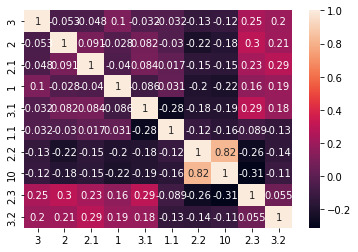

In [4]:
# training with a Deep Neural network

import pandas as pd
import seaborn as sns

datasetDirPath = "../../../../data/ML/sets/preproc/"
fileRootName = datasetDirPath + "1"
strat_train_set_file_path = fileRootName + ".csv"

df = pd.read_csv(strat_train_set_file_path)

corr_matrix = df.iloc[:, :-1].corr()
print(corr_matrix)

training_data_labels = (df.iloc[:, -1].replace({True: 1, False: 0}))
training_data = df.iloc[:, :-1]

# sns.pairplot(training_data, hue='Class')

sns.heatmap(training_data.corr(), annot=True)

# print(training_data_labels)